<a href="https://colab.research.google.com/github/sizhky/AutoTrain/blob/master/nbs/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup Data and Libraries

In [1]:
%%capture
# Setup imports
try:
    import timm
except:
    !pip install -U torch-snippets typer imgaug timm fastai

In [2]:
# Setup Data
%load_ext autoreload
%autoreload 2

from torch_snippets import *
from fastai.vision.all import *

# If running locally from AutoTrain/nbs
if not os.path.exists('/content') and P().resolve().stem != 'AutoTrain':
    %cd ..

# If running from colab
if os.path.exists('/content') and not os.path.exists('/content/AutoTrain'):
    !git clone https://github.com/sizhky/AutoTrain

# change present working directory
if not P().resolve().stem == 'AutoTrain':
    %cd AutoTrain

if not os.path.exists('horses_vs_zebras/data'):
    !wget -q https://tinyurl.com/odsc-cv-platform-HvZ1 -O data.zip
    !unzip -q data.zip
    !mkdir -p horses_vs_zebras
    !mv data horses_vs_zebras


/mnt/d04d289c-d0a7-4fd4-b883-ff227b3a8695/githubs/AutoTrain


## Verify Config

In [3]:
!cat configs/classification.ini

[project]
owner: sizhky
name: horses_vs_zebras
location: ${project.name}
model_directory: ${project.location}/models
type: classification
num_classes: 2

[label_studio]
base_data_dir: /tmp/data/

[label_studio_ml]
app_name: ${project.name}/my_ml_model
script_path: auto_train_classification/script_classification.py

[online_training]
save_dir: ${project.model_directory}/model.pt

[training]
dir: ${project.location}/data
train_ratio: 0.8

[training.data]
train_dir: ${training.dir}/train
validation_dir: ${training.dir}/test

[training.preprocess]
@preprocess_function: my_preprocess
image_size: ${architecture.image_size}

[training.scheme]
epochs: 5
freeze_epochs: 3
# initial_checkpoint: ${online_training.save_dir}
# mixup augmentation
mixup: 0.5
# cutmix
cutmix: 0.5
mixup_switch_prob: 0.3
amp: true
# random augmentations
aa: rand-m9-mstd0.5
batch_size: 8
output: ${project.model_directory}/trained-model-v1
output_path: ${training.scheme.output}/model.pt

[architecture]
image_size: 224
[arc

In [4]:
os.environ['CONFIG'] = 'configs/classification.ini'
!python auto_train_classification/train.py

2021-09-14 20:46:07.460 | INFO     | __main__:train_model:35 - Training from scratch!
2021-09-14 20:46:24.336 | INFO     | __main__:find_best_learning_rate:22 - LR Plot is saved at horses_vs_zebras/find_lr_plot.png
2021-09-14 20:46:24.336 | INFO     | __main__:find_best_learning_rate:24 - Suggested LRs: 0.0006309573538601399 and 0.0005754399462603033
2021-09-14 20:46:24.337 | INFO     | __main__:train_model:40 - Using lr: 0.0006309573538601399
['Epoch, Train Loss, Validation Loss, Validation Accuracy, Time']
[0, 0.7327926754951477, 0.6212319135665894, 0.671875, '00:01']
[1, 0.6092355251312256, 0.2537585198879242, 0.90625, '00:01']
[2, 0.5040589570999146, 0.15065526962280273, 0.96875, '00:02']
[0, 0.2145135998725891, 0.15730799734592438, 0.96875, '00:02']
[1, 0.2283490151166916, 0.14424791932106018, 0.984375, '00:02']
[2, 0.21411865949630737, 0.13109253346920013, 0.984375, '00:02']
[3, 0.21430400013923645, 0.12854628264904022, 0.984375, '00:02']
[4, 0.22127339243888855, 0.12878121435642

---
## Validate

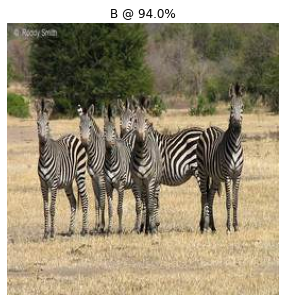

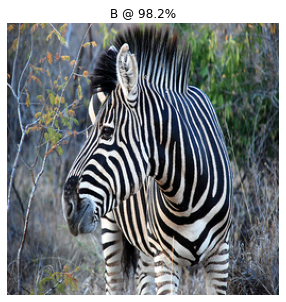

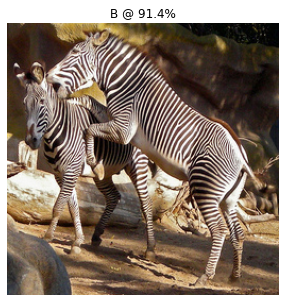

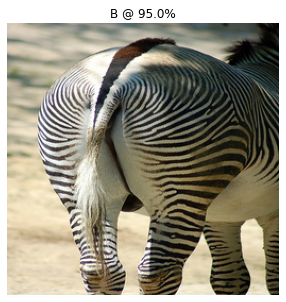

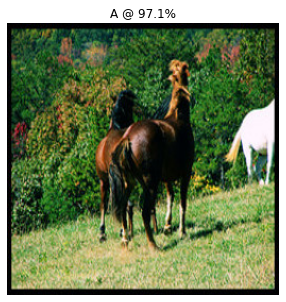

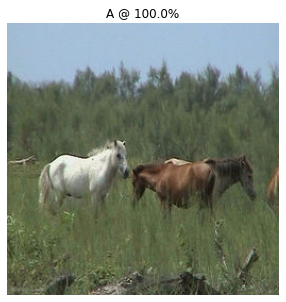

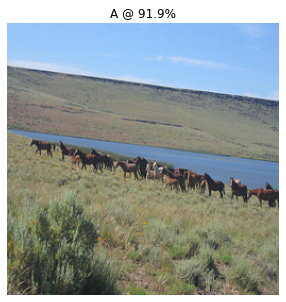

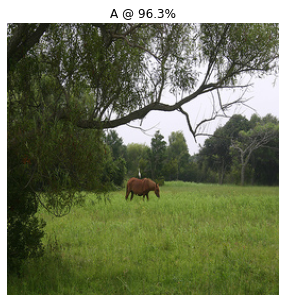

In [6]:
from auto_train_classification.infer import infer
p1 = infer('horses_vs_zebras/data/test/B')
p2 = infer('horses_vs_zebras/data/test/A')

In [7]:
p1, p2

([(» horses_vs_zebras/data/test/B/n02391049_2620.jpg, 'B', tensor(0.9398)),
  (» horses_vs_zebras/data/test/B/n02391049_2190.jpg, 'B', tensor(0.9818)),
  (» horses_vs_zebras/data/test/B/n02391049_3240.jpg, 'B', tensor(0.9140)),
  (» horses_vs_zebras/data/test/B/n02391049_1270.jpg, 'B', tensor(0.9505))],
 [(» horses_vs_zebras/data/test/A/n02381460_1000.jpg, 'A', tensor(0.9707)),
  (» horses_vs_zebras/data/test/A/n02381460_2120.jpg, 'A', tensor(0.9999)),
  (» horses_vs_zebras/data/test/A/n02381460_670.jpg, 'A', tensor(0.9190)),
  (» horses_vs_zebras/data/test/A/n02381460_3040.jpg, 'A', tensor(0.9626))])